In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)
%tensorflow_version 2.x



Mounted at /content/drive


In [2]:
!pip uninstall keras -y
!pip uninstall keras-nightly -y
!pip uninstall keras-Preprocessing -y
!pip uninstall keras-vis -y
!pip uninstall tensorflow -y

!pip install tensorflow==2.2.0
!pip install keras==2.3.0
!pip install vollseg 


Found existing installation: Keras 2.3.0
Uninstalling Keras-2.3.0:
  Successfully uninstalled Keras-2.3.0
Found existing installation: Keras-Preprocessing 1.1.2
Uninstalling Keras-Preprocessing-1.1.2:
  Successfully uninstalled Keras-Preprocessing-1.1.2
Found existing installation: tensorflow 2.2.0
Uninstalling tensorflow-2.2.0:
  Successfully uninstalled tensorflow-2.2.0
  Using cached tensorflow-2.2.0-cp37-cp37m-manylinux2010_x86_64.whl (516.2 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached Keras-2.3.0-py2.py3-none-any.whl (377 kB)


In [50]:

import os
import glob
import sys
import numpy as np
from tqdm import tqdm
from tifffile import imread, imwrite

from vollseg import UNET
from stardist.models import StarDist2D
from csbdeep.models import Config, CARE
from vollseg import SmartSeedPrediction2D, SuperUNETPrediction, doubleplot
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"
from pathlib import Path


In [56]:
ImageDir = '/content/drive/My Drive/TestDatasets/WBC/'
Model_Dir = '/content/drive/My Drive/Models/'

SaveDir = ImageDir + 'Results/'

NoiseModelName = None #'ScipyDenoising'
UNETModelName = 'UNETWBCSeg'
StarModelName = 'WBCSeg'
UnetModel = UNET(config = None, name = UNETModelName, basedir = Model_Dir)
StarModel = StarDist2D(config = None, name = StarModelName, basedir = Model_Dir)
NoiseModel = None #N2V(config=None, name=NoiseModelName, basedir=Model_Dir)

Loading network weights from 'weights_best.h5'.
Loading network weights from 'weights_last.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.741997, nms_thresh=0.3.


Generating SmartSeed results


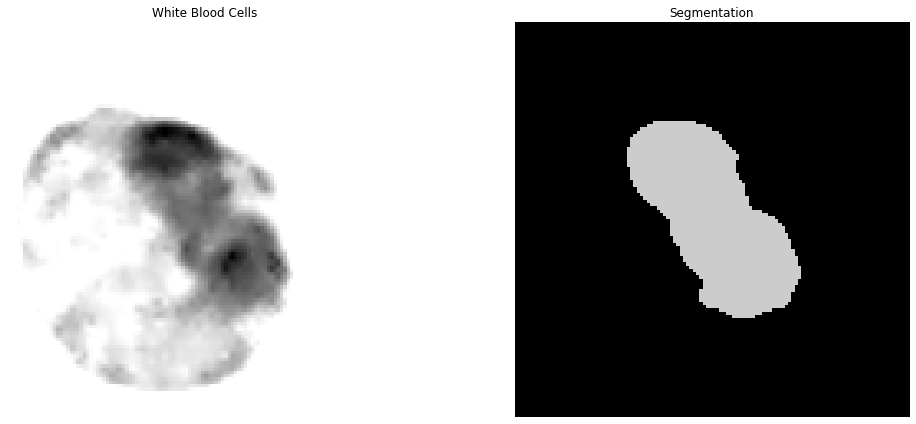

Generating SmartSeed results


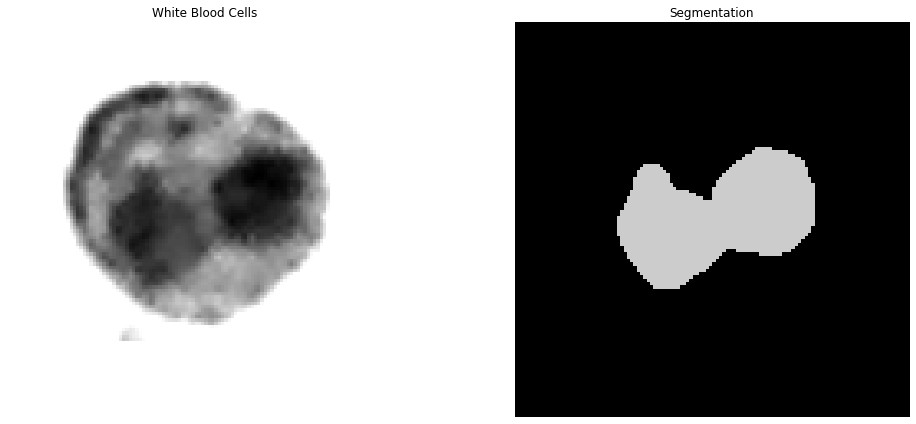

Generating SmartSeed results


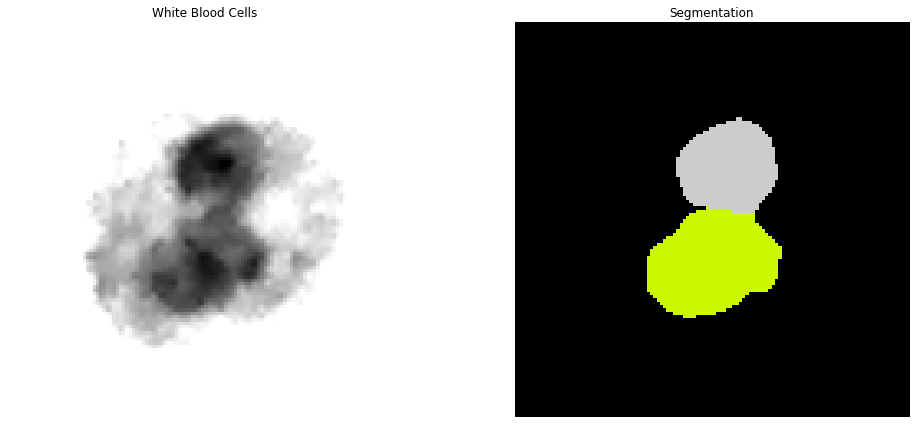

Generating SmartSeed results


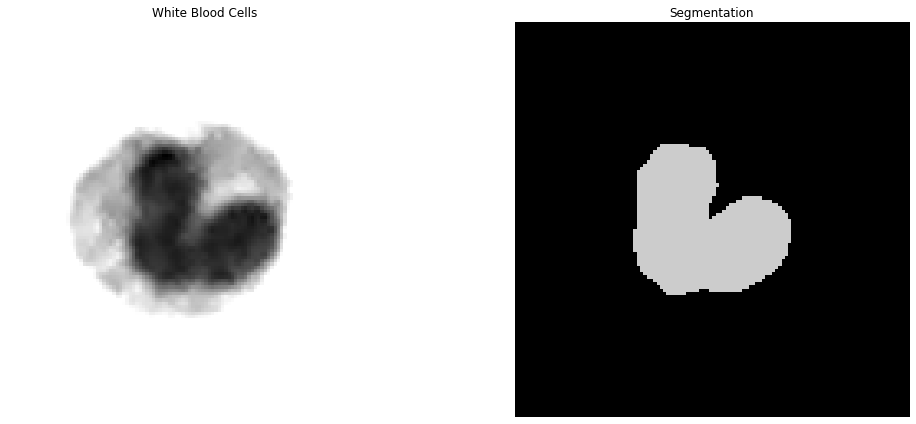

Generating SmartSeed results


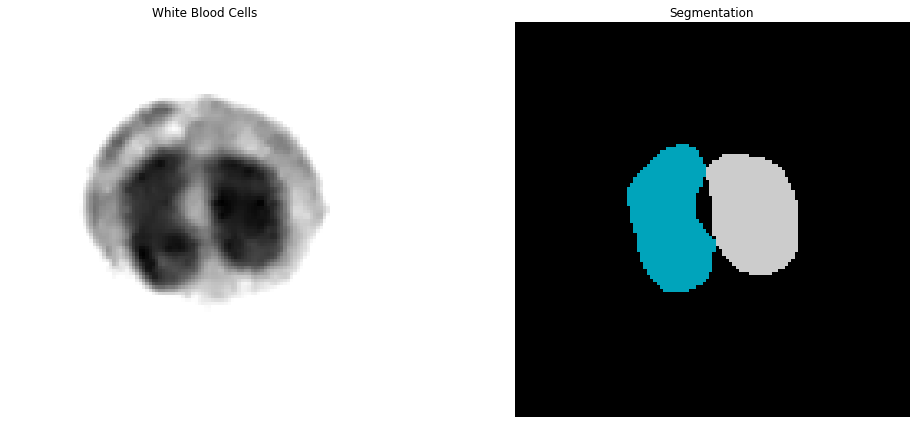

Generating SmartSeed results


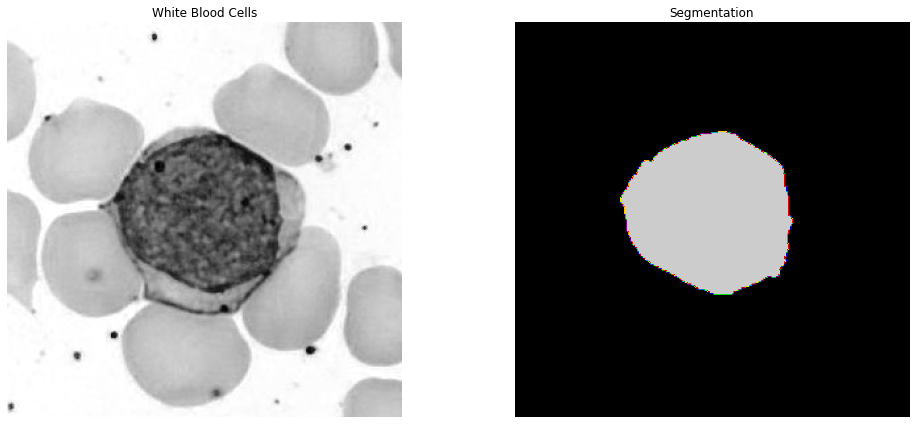

Generating SmartSeed results


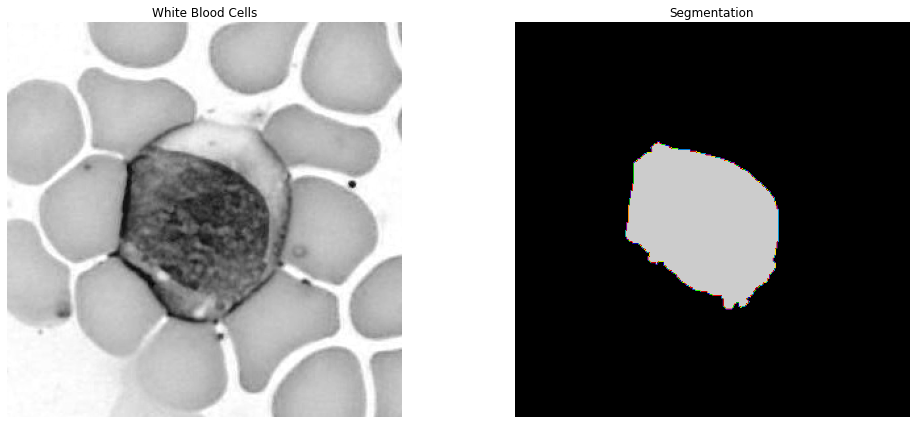

Generating SmartSeed results


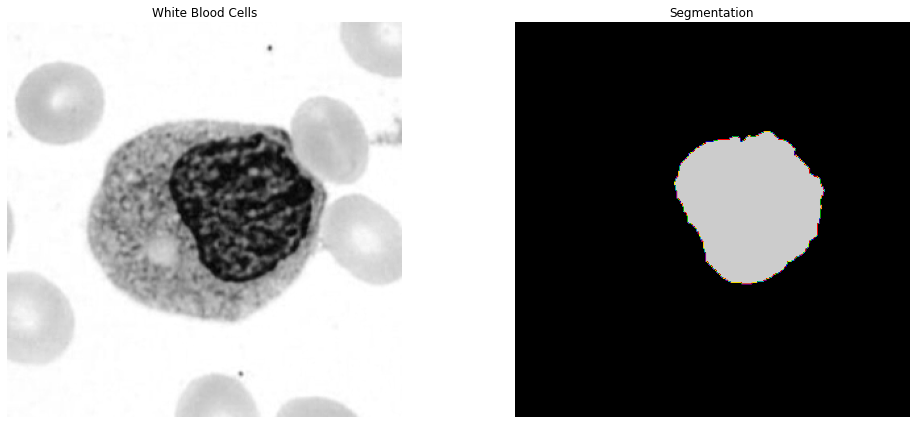

Generating SmartSeed results


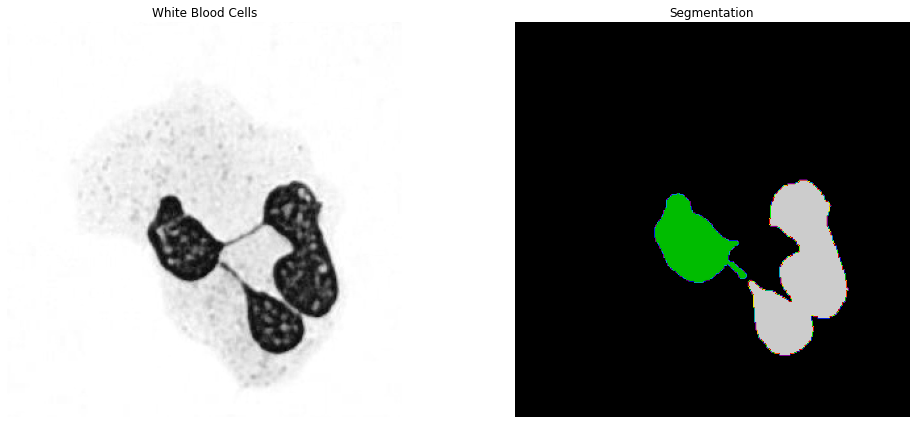

Generating SmartSeed results


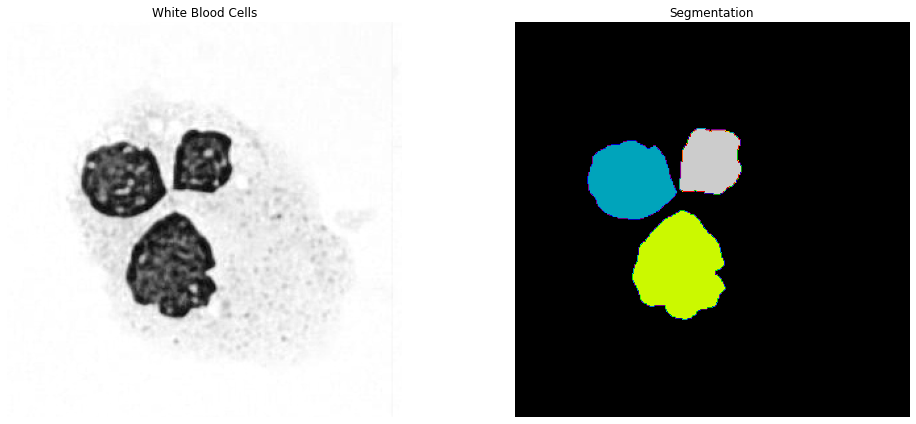

In [57]:
Raw_path = os.path.join(ImageDir, '*.tif')
filesRaw = glob.glob(Raw_path)
filesRaw.sort
min_size = 1
n_tiles = (1,1,1)

for fname in filesRaw:
     
     SmartSeedPrediction2D(SaveDir, fname, UnetModel, StarModel, min_size = min_size,  n_tiles = n_tiles, UseProbability = True, axes = 'YXC')

Loading network weights from 'weights_best.h5'.


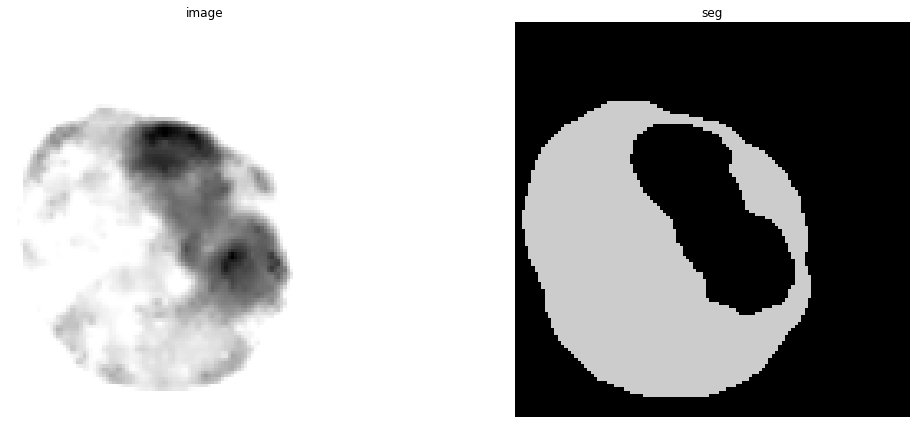

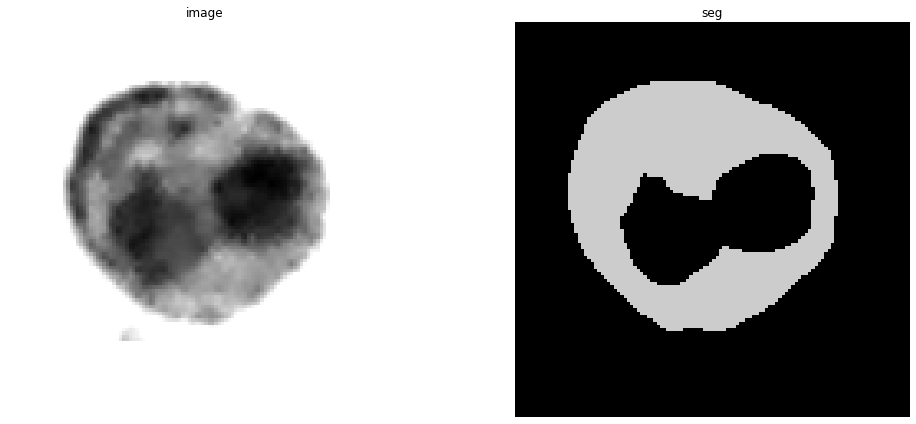

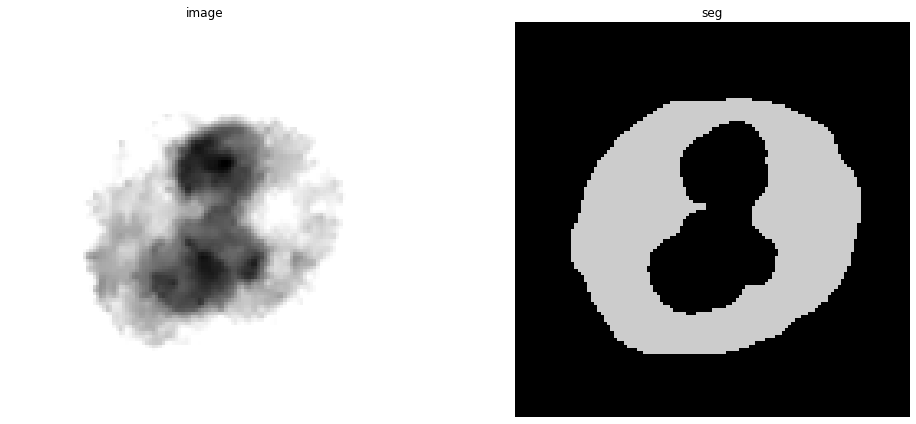

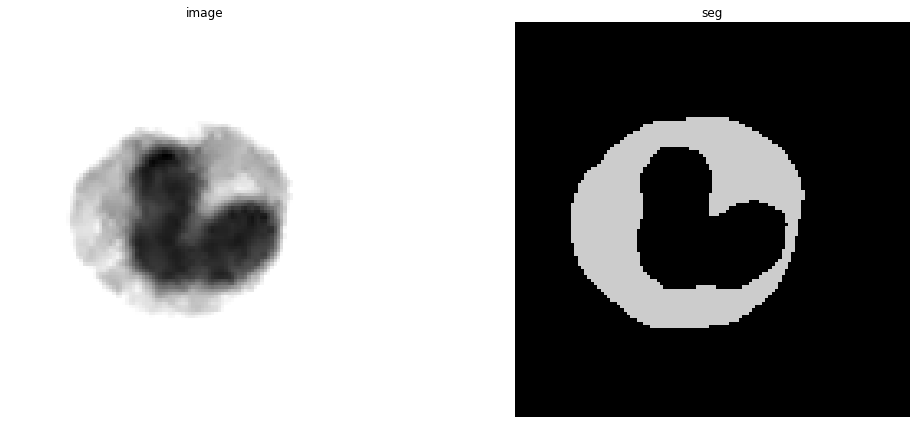

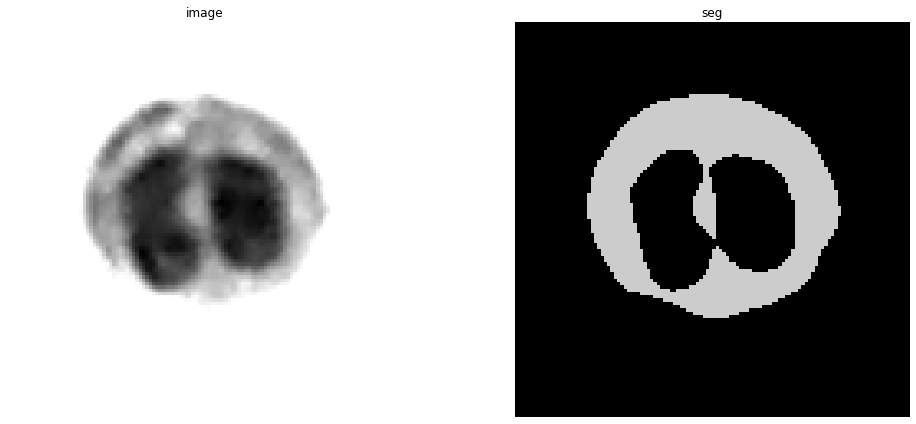

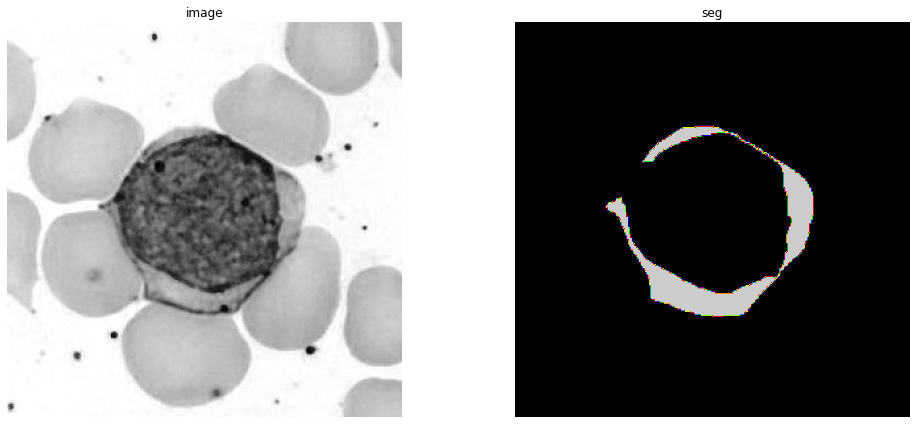

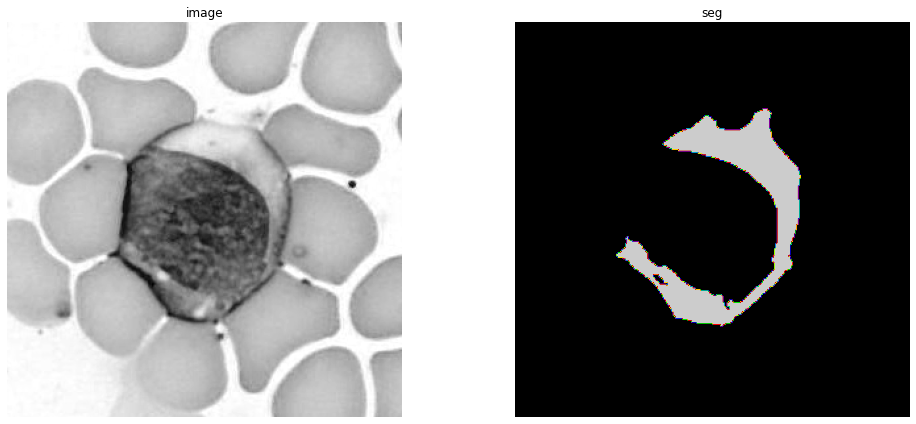

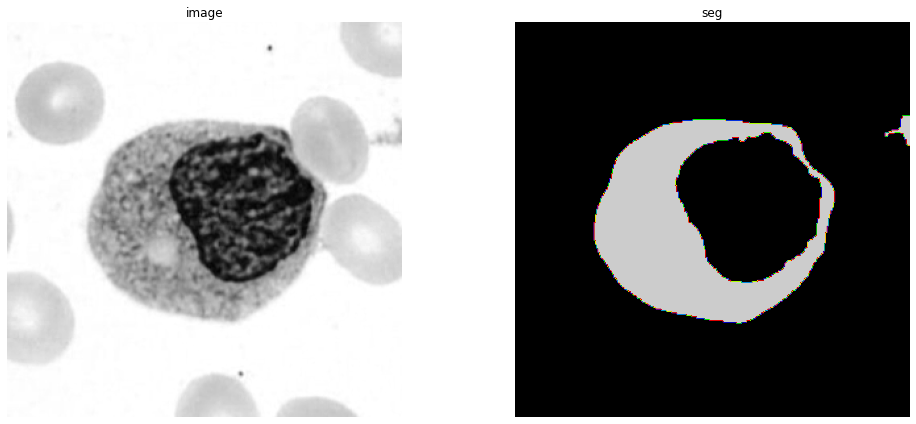

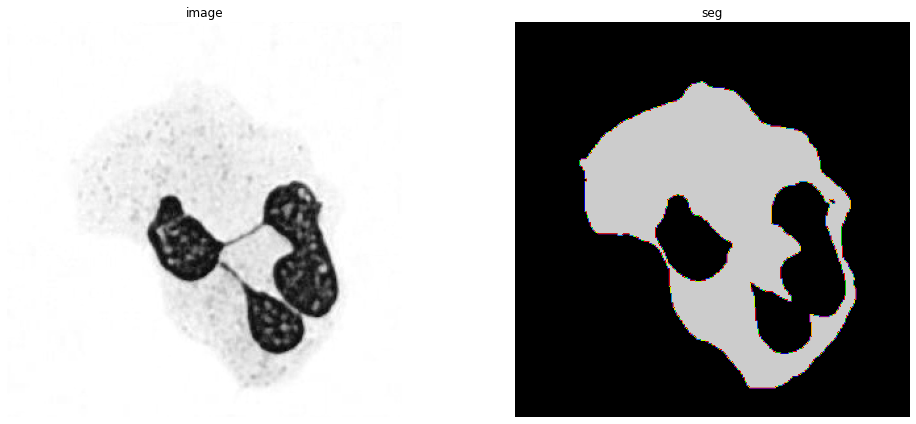

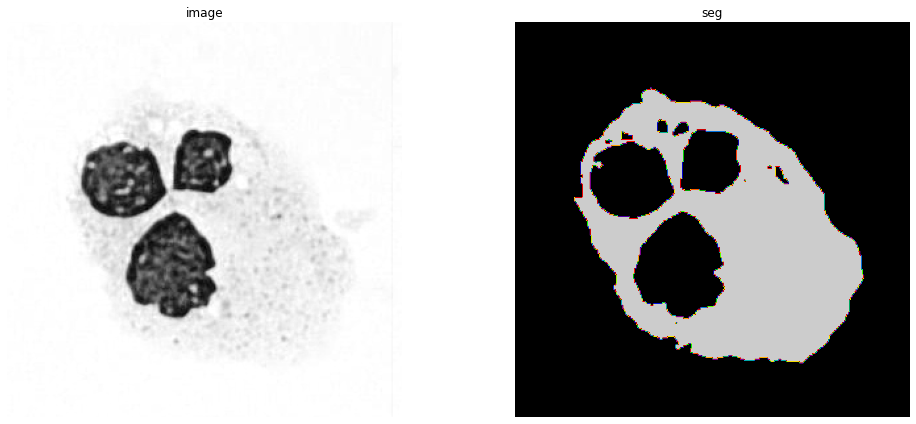

In [55]:
Raw_path = os.path.join(ImageDir, '*.tif')
filesRaw = glob.glob(Raw_path)
filesRaw.sort
min_size = 1
n_tiles = (1,1,1)
from skimage.morphology import remove_small_objects
UNETModelName = 'UNETWBCCytoSeg'

UnetModel = UNET(config = None, name = UNETModelName, basedir = Model_Dir)

for fname in filesRaw:
    image = imread(fname)
    seg = SuperUNETPrediction(image, UnetModel, n_tiles, 'YXC')
    seg = seg > 0
    seg =  remove_small_objects(seg, min_size = 50)
    doubleplot(image[:,:,0],seg[:,:,0], 'image', 'seg' )

In [29]:
import numpy as np
from skimage.measure import label
image = np.ones((10,10)) 
image = image * np.random.rand(1)
label_image = label(image)
print(label_image , image)
label_image = label(image*255)
print(label_image , image)

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]] [[0.38735218 0.38735218 0.38735218 0.38735218 0.38735218 0.38735218
  0.38735218 0.38735218 0.38735218 0.38735218]
 [0.38735218 0.38735218 0.38735218 0.38735218 0.38735218 0.38735218
  0.38735218 0.38735218 0.38735218 0.38735218]
 [0.38735218 0.38735218 0.38735218 0.38735218 0.38735218 0.38735218
  0.38735218 0.38735218 0.38735218 0.38735218]
 [0.38735218 0.38735218 0.38735218 0.38735218 0.38735218 0.38735218
  0.38735218 0.38735218 0.38735218 0.38735218]
 [0.38735218 0.38735218 0.38735218 0.38735218 0.38735218 0.38735218
  0.38735218 0.38735218 0.38735218 0.38735218]
 [0.38735218 0.38735218 0.38735218 0.38735218 0.38735218 0.38735218
  0.38735218 0.38735218 0.38735218 0.38735218]
 [0.38735218 0.38735218 0.38735218 0.38735218 0.38735218 0.38735218
  0.3873521

(10, 10) [[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]] [[0.33391377 0.33391377 0.33391377 0.33391377 0.33391377 0.33391377
  0.33391377 0.33391377 0.33391377 0.33391377]
 [0.33391377 0.33391377 0.33391377 0.33391377 0.33391377 0.33391377
  0.33391377 0.33391377 0.33391377 0.33391377]
 [0.33391377 0.33391377 0.33391377 0.33391377 0.33391377 0.33391377
  0.33391377 0.33391377 0.33391377 0.33391377]
 [0.33391377 0.33391377 0.33391377 0.33391377 0.33391377 0.33391377
  0.33391377 0.33391377 0.33391377 0.33391377]
 [0.33391377 0.33391377 0.33391377 0.33391377 0.33391377 0.33391377
  0.33391377 0.33391377 0.33391377 0.33391377]
 [0.33391377 0.33391377 0.33391377 0.33391377 0.33391377 0.33391377
  0.33391377 0.33391377 0.33391377 0.33391377]
 [0.33391377 0.33391377 0.33391377 0.33391377 0.33391377 0.33391377
  

255.0 [[255. 255. 255. 255. 255. 255. 255. 255. 255. 255.]
 [255. 255. 255. 255. 255. 255. 255. 255. 255. 255.]
 [255. 255. 255. 255. 255. 255. 255. 255. 255. 255.]
 [255. 255. 255. 255. 255. 255. 255. 255. 255. 255.]
 [255. 255. 255. 255. 255. 255. 255. 255. 255. 255.]
 [255. 255. 255. 255. 255. 255. 255. 255. 255. 255.]
 [255. 255. 255. 255. 255. 255. 255. 255. 255. 255.]
 [255. 255. 255. 255. 255. 255. 255. 255. 255. 255.]
 [255. 255. 255. 255. 255. 255. 255. 255. 255. 255.]
 [255. 255. 255. 255. 255. 255. 255. 255. 255. 255.]]
